# DATA ANALYSIS PROJECT #

E-Commerce Dataset

Link : https://drive.google.com/file/d/1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK/view

## DEFINING QUESTIONS

For the first step we will define several questions that later we'll answer based on our data.

1. Which products has the most and the least orders?
2. How are the demographics of our customers?
3. When was the last time the customer made a transaction?
4. How often has a customer made a purchase in the last few months?
5. How much money have customers spent in the last few months?

## IMPORT LIBRARIES AND DEPENDENCIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## DATA WRANGLING

### GATHERING DATA

In [2]:
# Gathering all tabels that are needed
customers_df = pd.read_csv("customers_dataset.csv")
order_items_df = pd.read_csv("order_items_dataset.csv")
orders_df = pd.read_csv("orders_dataset.csv")
products_df = pd.read_csv("products_dataset.csv")
products_translate_df = pd.read_csv("product_category_name_translation.csv")
sellers_df = pd.read_csv("sellers_dataset.csv")

In [3]:
# See customers
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
# See order items
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
# See orders
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
# See products
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [7]:
# See name translated
products_translate_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [8]:
# See sellers
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### ASSESSING DATA

#### Customers

In [9]:
# Assessing customers data
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [10]:
# customers table info is fine, see if there's any duplicate in dataframe
print("Total duplicate: ", customers_df.duplicated().sum())

Total duplicate:  0


In [11]:
# no duplicates, lets see the description
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [12]:
# Description is fine, let's see if there may any typo in city or state column
# print(customers_df['customer_city'].value_counts())

Based on above, it looks like there's no anything wrong with the customers data.

#### Order Items

In [13]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [14]:
# There is data type wrong with shipping limit date, lets first write it in
# the note, and continue to see the duplicate
print("Total duplicate: ", order_items_df.duplicated().sum())

Total duplicate:  0


In [15]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [16]:
# order_items_df['order_item_id'].value_counts()

Based on above, we found one mistyped column

#### Orders

In [17]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [18]:
# Theres missing values in 3 columns, lets put it in the note
print("Total duplicate: ", orders_df.duplicated().sum())

Total duplicate:  0


In [19]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [20]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [21]:
orders_df['order_status'].value_counts()

,count
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


Based on above, we found missing values in 3 columns and 4 mistyped columns from orders

#### Products

In [22]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [23]:
# There are lot of missing values in 8 columns
print("Total duplicate: ", products_df.duplicated().sum())

Total duplicate:  0


In [24]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [25]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [26]:
# Lets see if there are duplicates for product id column
products_df['product_id'].value_counts()

,count
product_id,
106392145fca363410d287a815be6de4,1
1e9e8ef04dbcff4541ed26657ea517e5,1
3aa071139cb16b67ca9e5dea641aaa2f,1
96bd76ec8810374ed1b65e291975717f,1
cef67bcfe19066a932b7673e239eb23d,1
...,...
03b63c5fc16691530586ae020c345514,1
14aa47b7fe5c25522b47b4b29c98dcb9,1
8c92109888e8cdf9d66dc7e463025574,1


Based on above, there is 2 errors which is 8 columns with missing values and mispelled column name

#### Sellers

In [27]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [28]:
# There are lot of missing values in 3 columns
print("Total duplicate: ", sellers_df.duplicated().sum())

Total duplicate:  0


There's no error in sellers.

### CLEANING DATA

Based on the assessment, here is the list of error found.
1. Data type of shipping limit date column in order_items_df should be changed from object
2. Data type of approved at, delivered carrier date, delivered customer date columns, order estimated delivery date and order purchase timestamp in orders_df should be changed from object
3. Missing values in approved at, delivered carrier date, delivered customer date in orders_df
4. Mispelled column name product name lenght and product description lenght columns in products_df
5. Product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm have missing values in products_df

#### Cleaning Error 1

In [29]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

In [30]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Cleaning Error 2

In [31]:
datetime_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in datetime_cols:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [32]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#### Cleaning Error 3

We will handle the missing values by dropping and replacing them. The reasons are because the big data volume and the column with missing value are not significant to the analysis. For all the remaining missing values in the used column, we will handle it by replacing them using the median delay time between each phase.

For the approach,
1. First, we will drop the unused columns (approved_at and delivered_carrier_date)
2. Second, we will try to create new column with the delay time between delivered customer date and purchased timestamp.
3. Then we will try to look for the median value.
4. We will then add the median with date in purchased timestamp.
5. The result from number 4 will replace the null value in delivered_customer_date column.

In [33]:
# first, delete the unused columns approved_at and delivered_carrier_date
orders_df = orders_df.drop(columns=['order_approved_at', 'order_delivered_carrier_date'])

In [34]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_delivered_customer_date  96476 non-null  datetime64[ns]
 5   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(3)
memory usage: 4.6+ MB


In [35]:
# next, we will try to create new column with the delay time
# between delivered customer date and purchased timestamp.
orders_df.loc[:, 'lead_time'] = orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']

In [36]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       99441 non-null  object         
 1   customer_id                    99441 non-null  object         
 2   order_status                   99441 non-null  object         
 3   order_purchase_timestamp       99441 non-null  datetime64[ns] 
 4   order_delivered_customer_date  96476 non-null  datetime64[ns] 
 5   order_estimated_delivery_date  99441 non-null  datetime64[ns] 
 6   lead_time                      96476 non-null  timedelta64[ns]
dtypes: datetime64[ns](3), object(3), timedelta64[ns](1)
memory usage: 5.3+ MB


In [37]:
# Then we will try to look for the median value.
lead_time_med = orders_df['lead_time'].median()

print("Lead time median: ", lead_time_med)

Lead time median:  10 days 05:13:34


In [38]:
# We will then add the median with date in purchased timestamp.
# and the result will fill the missing values in order_delivered_customer_date
orders_df.loc[orders_df['order_delivered_customer_date'].isnull(), 'order_delivered_customer_date'] = (orders_df['order_purchase_timestamp'] + lead_time_med)

# check the missing values
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       99441 non-null  object         
 1   customer_id                    99441 non-null  object         
 2   order_status                   99441 non-null  object         
 3   order_purchase_timestamp       99441 non-null  datetime64[ns] 
 4   order_delivered_customer_date  99441 non-null  datetime64[ns] 
 5   order_estimated_delivery_date  99441 non-null  datetime64[ns] 
 6   lead_time                      96476 non-null  timedelta64[ns]
dtypes: datetime64[ns](3), object(3), timedelta64[ns](1)
memory usage: 5.3+ MB


In [39]:
# Next we can try to fill the missing values in lead time based on the new value
orders_df.loc[orders_df['lead_time'].isnull(), 'lead_time'] = (orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp'])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       99441 non-null  object         
 1   customer_id                    99441 non-null  object         
 2   order_status                   99441 non-null  object         
 3   order_purchase_timestamp       99441 non-null  datetime64[ns] 
 4   order_delivered_customer_date  99441 non-null  datetime64[ns] 
 5   order_estimated_delivery_date  99441 non-null  datetime64[ns] 
 6   lead_time                      99441 non-null  timedelta64[ns]
dtypes: datetime64[ns](3), object(3), timedelta64[ns](1)
memory usage: 5.3+ MB


#### Cleaning Error 4

In [40]:
products_df.rename(columns={'product_name_lenght': 'product_name_length', 'product_description_lenght': 'product_description_length'}, inplace=True)

products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


#### Cleaning Error 5

We will handle the missing values by filling and replacing them, because of all the rows in this table may be important, deleting one values may affect the relation to other table.

We will divide it to two problems and solutions.
- The first one is product_category_name which has dtype object. Also, because theres no duplicate in product_id, we will handle it by filling it with 'Unknown Product [number]' for each ids with null category name value.  
- The second is name length, description length, photos quantity, weight, length, width, and height which have float dtype. We will handle it depends on the distribution, if skewed we'll using median and mean if its normal.

In [41]:
# The first problem and solution
# mask = products_df['product_category_name'].isnull()
# null_rows_total = mask.sum()

# products_df.loc[products_df['product_category_name'].str.contains('Unknown Product', na=False), 'product_category_name'] = 'Unknown Product'

products_df['product_category_name'].fillna(value='Unknown Product', inplace=True)

products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


<ipython-input-41-cea8addcb1f7>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_category_name'].fillna(value='Unknown Product', inplace=True)


In [42]:
# The second problem and solution
# skewed if value < -0,2 or value > 0,2
# symmetric or normal if -0,2 <= value <= 0,2

# See the skewed value
print("Name Length skew value: ", products_df['product_name_length'].skew())
print("Desc Length skew value: ", products_df['product_description_length'].skew())
print("Photos Qty skew value: ", products_df['product_photos_qty'].skew())
print("Weight g skew value : ", products_df['product_weight_g'].skew())
print("Length cm skew value: ", products_df['product_length_cm'].skew())
print("Height cm skew value: ", products_df['product_height_cm'].skew())
print("Width cm skew value: ", products_df['product_width_cm'].skew())

Name Length skew value:  -0.903221758762539
Desc Length skew value:  1.962092763448352
Photos Qty skew value:  2.19340913301457
Weight g skew value :  3.604859782275307
Length cm skew value:  1.7504597083360067
Height cm skew value:  2.1400612809133093
Width cm skew value:  1.6709713361516598


In [43]:
# Because all of them have skewed distribution, we'll use median
median_cols = [
    'product_name_length',
    'product_description_length',
    'product_photos_qty',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm',
    ]

for column in median_cols:
  products_df[column] = products_df[column].fillna(value=products_df[column].median())

products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_length         32951 non-null  float64
 3   product_description_length  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [44]:
products_df[products_df['product_category_name'] == 'Unknown Product']

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,Unknown Product,51.0,595.0,1.0,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,Unknown Product,51.0,595.0,1.0,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,Unknown Product,51.0,595.0,1.0,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,Unknown Product,51.0,595.0,1.0,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,Unknown Product,51.0,595.0,1.0,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,Unknown Product,51.0,595.0,1.0,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,Unknown Product,51.0,595.0,1.0,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,Unknown Product,51.0,595.0,1.0,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,Unknown Product,51.0,595.0,1.0,1300.0,45.0,16.0,45.0


## EXPLORATORY DATA ANALYSIS

### Customers

In [45]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Based on the above information, we can try to look our customer demographic based on the city or state.

In [46]:
customers_df.groupby(by="customer_city").customer_unique_id.nunique().sort_values(ascending=False)

,customer_unique_id
customer_city,
sao paulo,14984
rio de janeiro,6620
belo horizonte,2672
brasilia,2069
curitiba,1465
...,...
guimaraes,1
novo cabrais,1
guia lopes da laguna,1


Based on above, we can see most of our customers are coming from sao paulo, rio de janeiro, and belo horizonte with the respective numbers being 14984, 6620, and 2672.

In [47]:
customers_df.groupby(by="customer_state").customer_unique_id.nunique().sort_values(ascending=False)

,customer_unique_id
customer_state,
SP,40302
RJ,12384
MG,11259
RS,5277
PR,4882
SC,3534
BA,3277
DF,2075
ES,1964


Based on above, we also can see that most of our customers are coming from the states of **SP, RJ, and MG** with the respective numbers are 40302, 12384, 11259.

### Orders and customers

In [48]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       99441 non-null  object         
 1   customer_id                    99441 non-null  object         
 2   order_status                   99441 non-null  object         
 3   order_purchase_timestamp       99441 non-null  datetime64[ns] 
 4   order_delivered_customer_date  99441 non-null  datetime64[ns] 
 5   order_estimated_delivery_date  99441 non-null  datetime64[ns] 
 6   lead_time                      99441 non-null  timedelta64[ns]
dtypes: datetime64[ns](3), object(3), timedelta64[ns](1)
memory usage: 5.3+ MB


We can try to substract between delivered customer date and purchase to create a new column called 'delivery time'

In [49]:
orders_df.loc[:, 'delivery_time'] = orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']

orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,lead_time,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,8 days 10:28:40
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,13 days 18:46:08
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,9 days 09:27:40
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,13 days 05:00:36,13 days 05:00:36
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,2 days 20:58:23,2 days 20:58:23


In [50]:
orders_df.describe()

,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,lead_time,delivery_time
count,99441,99441,99441,99441,99441
mean,2017-12-31 08:43:12.776581120,2018-01-12 20:27:13.998159616,2018-01-24 03:08:37.730111232,12 days 11:44:01.221578624,12 days 11:44:01.221578624
min,2016-09-04 21:15:19,2016-09-15 02:28:53,2016-09-30 00:00:00,0 days 12:48:07,0 days 12:48:07
25%,2017-09-12 14:46:19,2017-09-22 19:40:01,2017-10-03 00:00:00,6 days 20:58:16,6 days 20:58:16
50%,2018-01-18 23:04:36,2018-02-01 12:03:58,2018-02-15 00:00:00,10 days 05:13:34,10 days 05:13:34
75%,2018-05-04 15:42:16,2018-05-15 16:29:06,2018-05-25 00:00:00,15 days 08:42:51,15 days 08:42:51
max,2018-10-17 17:30:18,2018-10-27 22:43:52,2018-11-12 00:00:00,209 days 15:05:12,209 days 15:05:12
std,NaN,NaN,NaN,9 days 09:52:38.280638855,9 days 09:52:38.280638855


Based on above, we can see that the average of delivery date is **12 days and 11+ hours** with the fastest delivery time is 12 hours. The maximum value for delivery time is 209 days 15+ hours. It seems like the maximum is an outlier.

Next we can try to find how many customers who are active by seeing them id if they have orders something in orders_df

In [51]:
# let's create the new column customer_status in customers first
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["customer_status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_status
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active


In [52]:
# now let's see the distribution of active and non active customers
customers_df['customer_status'].value_counts()

,count
customer_status,
Active,99441


As we can see from above that all of our customers are active customers

In [53]:
# Now lets see the distribution of order based on city or state
# first we will add column in customer table to add "customer_label"
# for readable purpose
# create label for each customer unique id
unique_ids = customers_df['customer_unique_id'].drop_duplicates().reset_index(drop=True)
customer_labels = pd.Series(
    data='Customer ' + (unique_ids.index + 1).astype(str),
    index=unique_ids
)

# Map the labels to new column
customers_df['customer_label'] = customers_df['customer_unique_id'].map(customer_labels)

customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_status,customer_label
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,Customer 1
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,Customer 2
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,Customer 3
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,Customer 4
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,Customer 5


In [54]:
# second we need to merge the orders and customers table
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id",
)

orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,lead_time,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_status,customer_label
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,8 days 10:28:40,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,Customer 68585
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,13 days 18:46:08,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active,Customer 74977
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,9 days 09:27:40,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active,Customer 555
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,13 days 05:00:36,13 days 05:00:36,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active,Customer 59790
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,2 days 20:58:23,2 days 20:58:23,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active,Customer 65715


In [55]:
# Lets see the distribution based on city
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


In [56]:
# Now the distribution based on state
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_state,order_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


As we can see from above, based on city sao paulo, rio de janeiro, and belo horizonte are the top three city with the most number of orders. While top three most orders based on state are SP, RJ, and MG.

### Order Items

In [57]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [58]:
order_items_df.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633928,15.806405


Based on above, we can see that the largest number of product purchases in one order is 21 products with a maximum price of one product that has been ordered is 6735 and a maximum freight of one product that has been ordered is 409,68.

### Products and Product Category Name Translation

In [84]:
products_df.describe()

,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,48.523656,768.227945,2.166975,2276.376802,30.814725,16.937422,23.196534
std,10.156155,629.658469,1.728063,4281.926387,16.914005,13.637175,12.078707
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


As we can see from above, there are about 32951 products listed with maximum value for weight is 40425 grams and average weight is around 4281,93 grams.

In [85]:
products_df.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [86]:
products_translate_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


We will try to merge the products df and products translate df to get the english name from the product.

In [87]:
products_translated_df = pd.merge(
    left=products_df,
    right=products_translate_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name",
)

products_translated_df

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [88]:
# We can see the total of each product category
products_translated_df["product_category_name_english"].value_counts()

,count
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
...,...
tablets_printing_image,9
fashion_childrens_clothes,5
home_comfort_2,5


We can see that product category 'bed_bath_table' is the largest number product category on the list with 3029 products listed.

In [89]:
# We can see which product category has the most weight in total
products_translated_df.groupby(by="product_category_name_english").agg({
    "product_id": "nunique",
    "product_weight_g": ["sum", "min", "max"],
}).sort_values(by=("product_weight_g", "sum"), ascending=False)

product_id product_weight_g                
                                 nunique              sum    min      max
product_category_name_english                                            
furniture_decor                     2657        7992965.0    2.0  30000.0
bed_bath_table                      3029        7440451.0    0.0  40425.0
housewares                          2335        7053553.0   50.0  30000.0
sports_leisure                      2867        5804731.0   50.0  30000.0
auto                                1900        5043836.0   50.0  30000.0
...                                  ...              ...    ...      ...
fashion_sport                         19           6550.0  100.0   1500.0
tablets_printing_image                 9           3433.0  100.0   1100.0
security_and_services                  2           1625.0  400.0   1225.0
fashion_childrens_clothes              5           1620.0  100.0    600.0
cds_dvds_musicals                      1            550.0  550.0    550.0

[71 rows x 4 columns]

We can see from above that product category 'furniture decor' contribute the most weight, while product with the most weight is from 'bed_bath_table' category.

### Product Translated and Order Items

In [65]:
# Before we continue we will merge both table with only some columns of
# product translated will be added
order_item_product_df = pd.merge(
    left=order_items_df,
    right=products_translated_df[["product_id", "product_category_name_english"]],
    how="left",
    left_on="product_id",
    right_on="product_id",
)

order_item_product_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,computers_accessories


In [66]:
# We can try to see which product has the most orders
order_item_product_df["product_category_name_english"].value_counts()

,count
product_category_name_english,
bed_bath_table,11115
health_beauty,9670
sports_leisure,8641
furniture_decor,8334
computers_accessories,7827
...,...
arts_and_craftmanship,24
cds_dvds_musicals,14
la_cuisine,14


As we can see, "bed bath table" is the product category with the most orders with 11115 orders in total, while "security and services" is the least orders with only 2 orders.

Next we can try to see which product category that has the most and the least sells.

In [67]:
# We can see which product category has the most sells in total
order_item_product_df.groupby(by="product_category_name_english").agg({
    "order_id": "count",
    "price": ["sum", "min", "max"],
}).sort_values(by=("price", "sum"), ascending=False)

order_id       price                 
                                 count         sum     min      max
product_category_name_english                                      
health_beauty                     9670  1258681.34    1.20  3124.00
watches_gifts                     5991  1205005.68    8.99  3999.90
bed_bath_table                   11115  1036988.68    6.99  1999.98
sports_leisure                    8641   988048.97    4.50  4059.00
computers_accessories             7827   911954.32    3.90  3699.99
...                                ...         ...     ...      ...
flowers                             33     1110.04   15.60    65.90
home_comfort_2                      30      760.27   12.90   219.99
cds_dvds_musicals                   14      730.00   45.00    65.00
fashion_childrens_clothes            8      569.85   39.99   110.00
security_and_services                2      283.29  100.00   183.29

[71 rows x 4 columns]

While bed bath tables is the most orders product category, but in term of prices, "health and beauty" is the product with the most sells with revenue of 1258681.34, while "security and services" is the product category with the least sells with revenue only 283.29.

In [68]:
# next we also can see which product category has contribute the most to freight
order_item_product_df.groupby(by="product_category_name_english").agg({
    "order_id": "count",
    "freight_value": ["sum", "min", "max"],
}).sort_values(by=("freight_value", "sum"), ascending=False)

order_id freight_value               
                                 count           sum    min     max
product_category_name_english                                      
bed_bath_table                   11115     204693.04   0.00  225.71
health_beauty                     9670     182566.73   0.00  338.30
furniture_decor                   8334     172749.30   0.00  215.43
sports_leisure                    8641     168607.51   0.01  293.27
computers_accessories             7827     147318.08   0.06  134.17
...                                ...           ...    ...     ...
arts_and_craftmanship               24        370.13   7.39   68.72
la_cuisine                          14        333.55   0.11   39.19
cds_dvds_musicals                   14        224.99   9.94   52.58
fashion_childrens_clothes            8         95.51   6.43   17.07
security_and_services                2         41.22  15.45   25.77

[71 rows x 4 columns]

As we can see from above, "bed bath table" is the product with the most contribution to the freight value with 204693.04.

### Orders, Customers, Order Items, Products

In [69]:
# Before we explore, we'll merge all previous merged table
all_df = pd.merge(
    left=orders_customers_df,
    right=order_item_product_df,
    how="left",
    left_on="order_id",
    right_on="order_id",
)

all_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,lead_time,delivery_time,customer_unique_id,customer_zip_code_prefix,...,customer_state,customer_status,customer_label,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,8 days 10:28:40,7c396fd4830fd04220f754e42b4e5bff,3149,...,SP,Active,Customer 68585,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,13 days 18:46:08,af07308b275d755c9edb36a90c618231,47813,...,BA,Active,Customer 74977,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,9 days 09:27:40,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,GO,Active,Customer 555,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,13 days 05:00:36,13 days 05:00:36,7c142cf63193a1473d2e66489a9ae977,59296,...,RN,Active,Customer 59790,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,2 days 20:58:23,2 days 20:58:23,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,SP,Active,Customer 65715,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,stationery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-03-02,22 days 04:38:58,22 days 04:38:58,da62f9e57a76d978d02ab5362c509660,11722,...,SP,Active,Customer 76301,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,baby
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-09-27,24 days 20:37:34,24 days 20:37:34,737520a9aad80b3fbbdad19b66b37b30,45920,...,BA,Active,Customer 19749,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,home_appliances_2
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-02-15,17 days 02:04:27,17 days 02:04:27,5097a5312c8b157bb7be58ae360ef43c,28685,...,RJ,Active,Customer 16808,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,computers_accessories
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-02-15,17 days 02:04:27,17 days 02:04:27,5097a5312c8b157bb7be58ae360ef43c,28685,...,RJ,Active,Customer 16808,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,computers_accessories


In [70]:
# all_df.groupby(by=["customer_state", "product_category_name_english"]).agg({
#     "order_id": "nunique",
#     "price": ["sum", "min", "max"]
# }).sort_values(by=("order_id", "nunique"), ascending=False)


state_product_df = all_df.groupby(['customer_state', 'product_category_name_english']).agg(
    order_count=('order_id', 'count'),
    total_price=('price', 'sum')
    ).sort_values(
        ['customer_state', 'order_count'],
        ascending=[True, False]
        ).groupby(level=0).head(3).assign(
            state_total_orders=lambda x: x.index.get_level_values(0)
            .map(
                all_df.groupby('customer_state')['order_id'].nunique())
            ).sort_values(
                by='state_total_orders',
                ascending=False
                ).drop(columns='state_total_orders')

state_product_df

order_count  total_price
customer_state product_category_name_english                          
SP             health_beauty                         4204    462305.22
               bed_bath_table                        5235    478284.52
               sports_leisure                        3667    386357.01
RJ             furniture_decor                       1090     98427.86
               health_beauty                         1064    145298.62
...                                                   ...          ...
AP             health_beauty                           10      1380.58
               computers_accessories                    9      2149.52
RR             sports_leisure                           8      1350.60
               health_beauty                            7      1050.61
               furniture_decor                          6       590.99

[81 rows x 2 columns]

We can see from above the distribution of preferred product category in each state. For example in SP state, bed_bath_table is the most preferred product.

### Sellers

In [71]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [72]:
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
...,...
aguas claras df,1
ao bernardo do campo,1
angra dos reis rj,1


In [73]:
sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

,seller_id
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171
RS,129
GO,40
DF,30
ES,23


As we can see from above, city with the most sellers are Sao Paulo, followed by Curitiba, and Rio de Janeiro. Meanwhile, state with the most sellers are SP, PR, and MG.

## DATA VISUALIZATION

### Which products has the most and the least orders?

In [74]:
products_sells_df = all_df.groupby("product_category_name_english").order_id.count().sort_values(ascending=False).reset_index()

products_sells_df.rename(columns={'product_category_name_english': 'product_category', 'order_id': 'order_total'}, inplace=True)
products_sells_df

,product_category,order_total
0,bed_bath_table,11115
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827
...,...,...
66,arts_and_craftmanship,24
67,la_cuisine,14
68,cds_dvds_musicals,14
69,fashion_childrens_clothes,8


<ipython-input-75-dec17d7c5e59>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_total", y="product_category", data=products_sells_df.head(5), palette=colors, ax=ax[0])
<ipython-input-75-dec17d7c5e59>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_total", y="product_category", data=products_sells_df.sort_values(by="order_total", ascending=True).head(5), palette=colors, ax=ax[1])


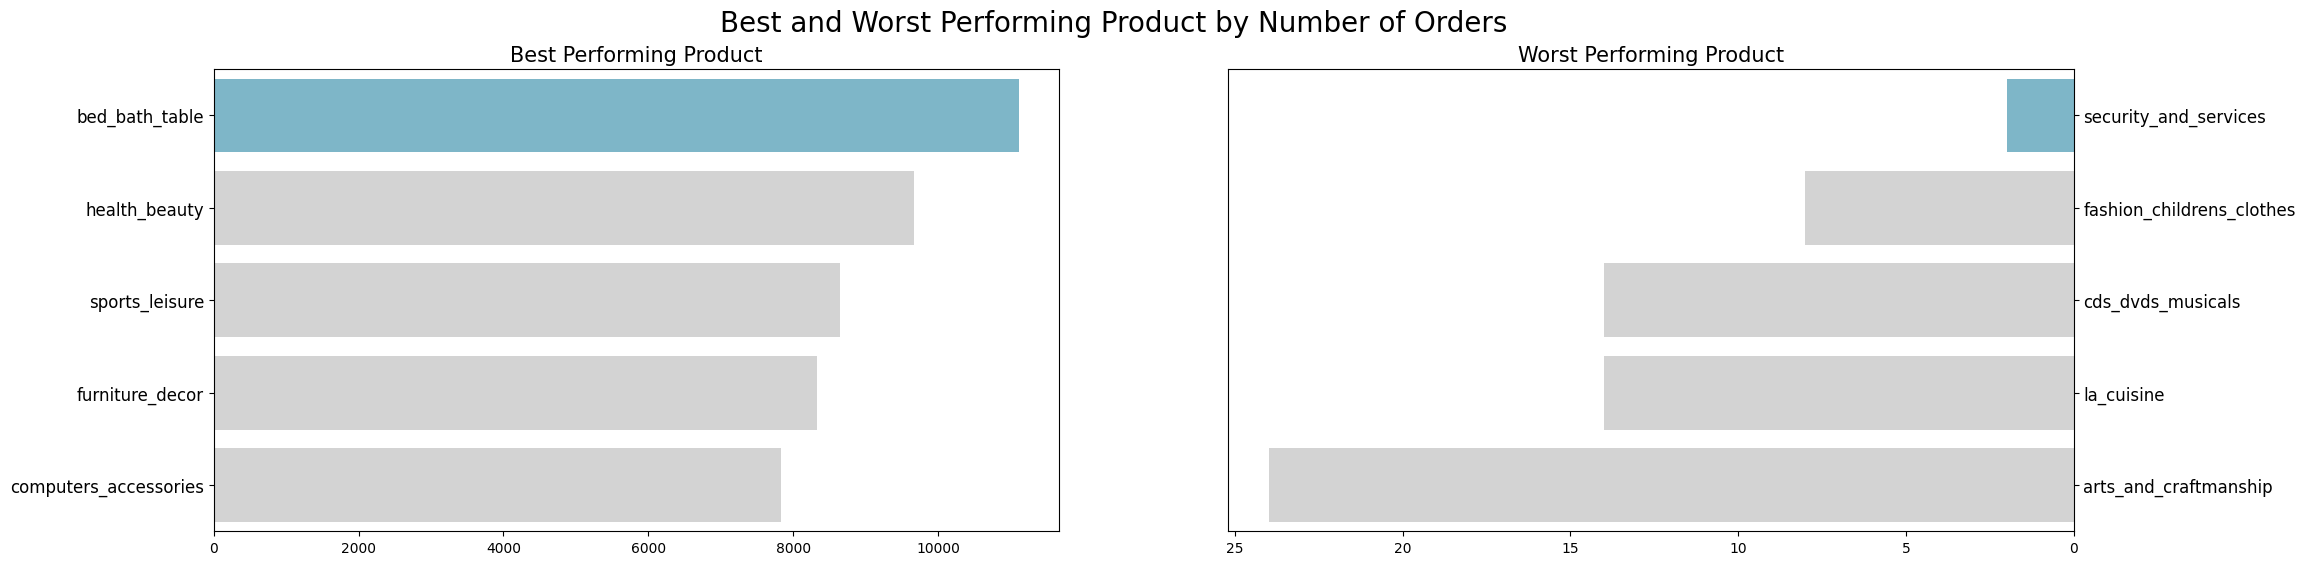

In [75]:
# Now lets create the bar chart
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_total", y="product_category", data=products_sells_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="order_total", y="product_category", data=products_sells_df.sort_values(by="order_total", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Orders", fontsize=20)
plt.show()

### How are the demographics of our customers?

In [76]:
customers_states_df = all_df.groupby(by="customer_state").customer_unique_id.nunique().sort_values(ascending=False).reset_index()
customers_states_df.rename(columns={"customer_state": "state", "customer_unique_id": "customer_count"}, inplace=True)
customers_states_df

,state,customer_count
0,SP,40302
1,RJ,12384
2,MG,11259
3,RS,5277
4,PR,4882
5,SC,3534
6,BA,3277
7,DF,2075
8,ES,1964
9,GO,1952


<ipython-input-77-4fc7a14a1336>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-77-4fc7a14a1336>:4: UserWarning: 
The palette list has fewer values (8) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


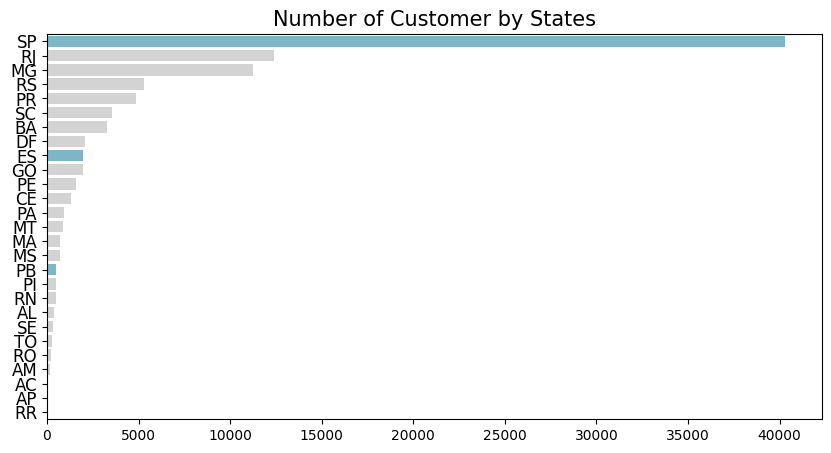

In [77]:
# Now lets create the bar chart
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count",
    y="state",
    data=customers_states_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### When was the last time the customer made a transaction?
### How often has a customer made a purchase in the last few months?
### How much money have customers spent in the last few months?

To answer those three questions, we will use RFM analysis which consists of
parameters like Recency, Frequency, and Monetary. This method will help us to group the customers based on that 3 parameters and find which customer who made the last order, who made the most orders, and who contributed most to the revenue.

In [78]:
rfm_df = all_df.groupby(by="customer_label", as_index=False).agg({
    "order_purchase_timestamp": "max", # get last date order
    "order_id": "nunique", # count total order
    "price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_label", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.sort_values(by="monetary", ascending=False)

,customer_label,frequency,monetary,recency
57623,Customer 6186,1,13440.0,383
18912,Customer 27019,2,7388.0,564
94641,Customer 95176,1,7160.0,94
3767,Customer 13389,1,6735.0,612
12220,Customer 20997,1,6729.0,84
...,...,...,...,...
63148,Customer 66832,1,0.0,506
7490,Customer 1674,1,0.0,462
51205,Customer 56083,1,0.0,344
6041,Customer 15435,1,0.0,433


In [79]:
print("The distance in days a customer made an order: ", rfm_df["recency"].min())

The distance in days a customer made an order:  0


In [80]:
print("The most number of orders from 1 customer: ", rfm_df["frequency"].max())

The most number of orders from 1 customer:  17


In [81]:
print("The most revenue gained from 1 customer: ", rfm_df["monetary"].max())

The most revenue gained from 1 customer:  13440.0


<ipython-input-82-0e473af44e18>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_label", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-82-0e473af44e18>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_label", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-82-0e473af44e18>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="customer_label", data=rfm_df.sort_va

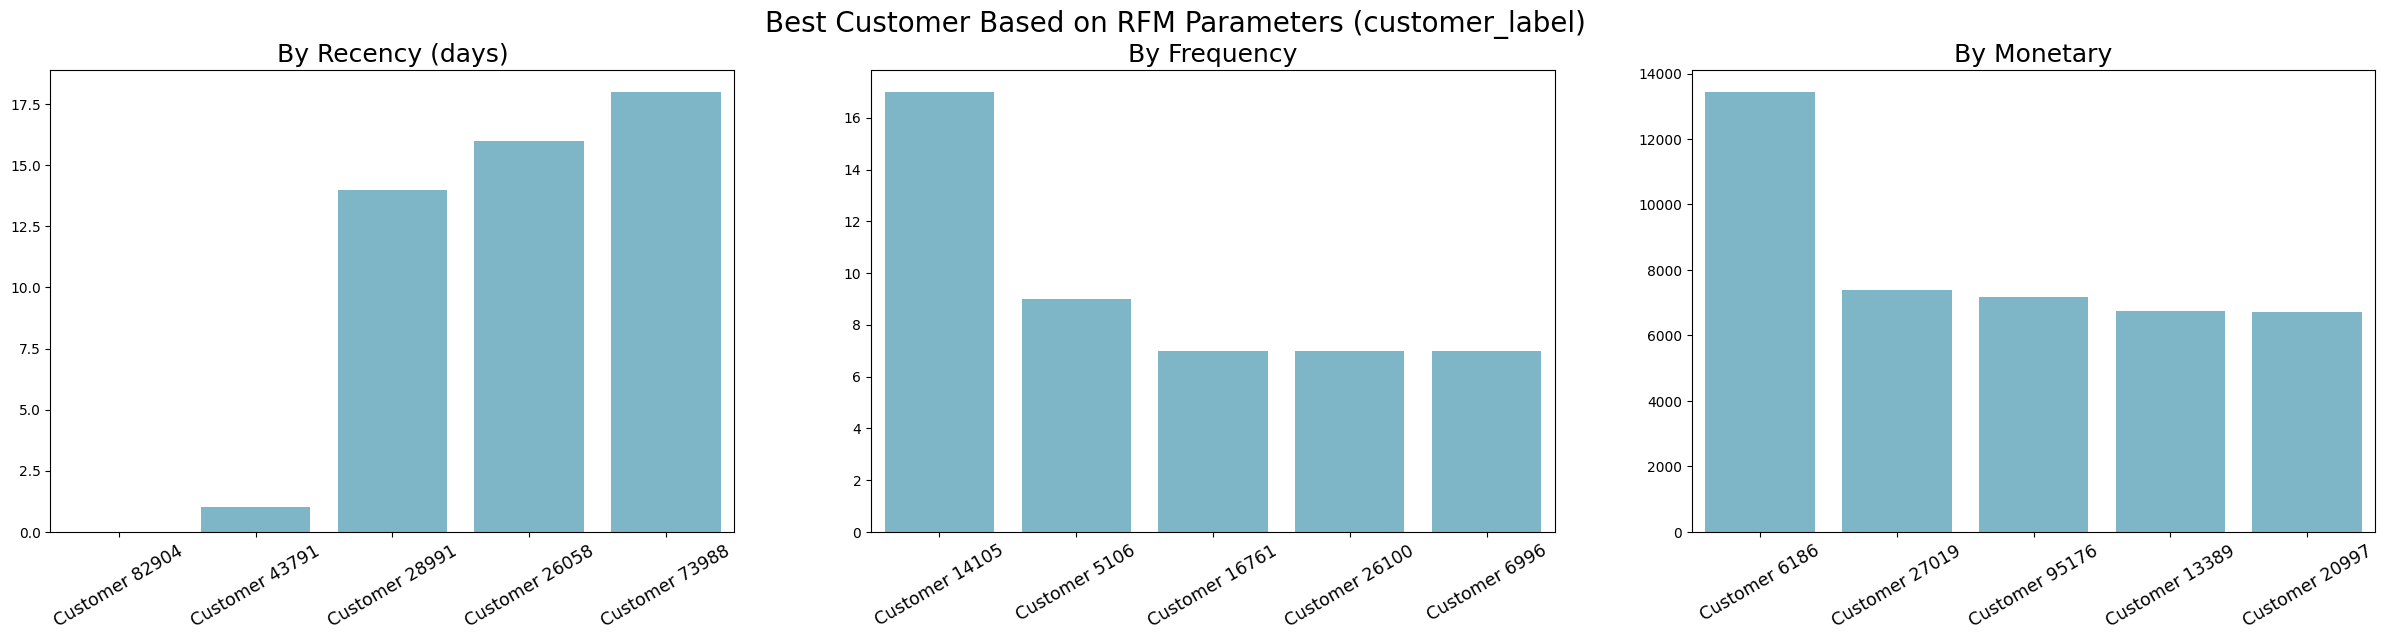

In [82]:
# Lets create the visualization
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_label", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=12.5, labelrotation=30)

sns.barplot(y="frequency", x="customer_label", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=12.5, labelrotation=30)

sns.barplot(y="monetary", x="customer_label", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=12.5, labelrotation=30)

plt.suptitle("Best Customer Based on RFM Parameters (customer_label)", fontsize=20)
plt.show()

As we can see from above, customer 82904 is latest customer that make an order, customer who place orders the most is customer 14105, and customer who spends the most is customer 6186.

## SAVE DATA

In [83]:
all_df.to_csv("main_data.csv", index=False)

## SUMMARIZATION
1. There are 6 that will be used for analysis, those are customers, order items, orders, product category name translation, products, and sellers.
2. From the assessing steps, we mostly found a lot of missing values, mistyped date column, and also mispelled column name.
3. From the cleaning steps, we handled the missing value mostly by filling them with median, changed the date columns' dtype from object to datetime, and rename the column that has mispelled name.
4. From the exploratory steps, here's the list of what I found in the dataset:
- **Most of our customers** are coming from **city** like **Sao Paulo, Rio de Janeiro, and Belo Horizonte** with the respective numbers being 14984, 6620, and 2672.
- Based on **states, most of our customers** are coming from **SP, RJ, and MG** with the respective numbers are 40302, 12384, 11259.
- We found that the **average lead time** started from when the customers purchase the order until they receive the order is around **12 days and 12 hours.**
- We also found that **all of our customers are active customers** who have at least made an order once.
- **Most of our orders** based on city are coming from **Sao paulo, Rio de Janeiro, and Belo Horizonte**. Meanwhile, the top three **states with most orders are SP, RJ, and MG.**
- The largest number of product purchases in one order is **21 products**, a **maximum price of one product that has been ordered is 6735** and **a maximum freight of one product that has been ordered is 409,68**.
- There are about **32951 products listed** with **'bed bath table' as the product with the largest number with 3029 products** listed.
- The **maximum value for weight is 40425 grams** from the 'bed bath table' category and **average weight is around 4281,93 grams**, with 'furniture decor' contribute to the most weight total with **7992965.0 grams.**
- Product **"bed bath table"** is the product category with **the most orders with 11115 orders** in total, while **"security and services" is the least orders with only 2 orders.**
- In term of prices, **"health and beauty" is the product with the most sells with revenue of 1258681.34**, while **"security and services" is the product category with the least sells with revenue only 283.29.**
- "bed bath table" is the product with the most contribution to the freight value with 204693.04.
- Most of our sellers are coming from city like Sao Paulo, followed by Curitiba, and Rio de Janeiro. Meanwhile, state with the most sellers are SP, PR, and MG.
5. From out visualization steps, the answers for our business questions are:
- Product category with the most orders is "bed bath table" with 11115 orders and product category with the least orders is "security and services" with 2 orders.
- Most of our customers are coming from states like SP, RJ, and MG.
- The last customer who made an order is customer 82904 with 0 days from the current day. Meanwhile, the average order recency is 287,1 days.
- The customer who makes the most orders is customer 14105 with 17 orders. Meanwhile, the average frequency of order is 1,03 order per customer.
- The customer who contributes the most to revenue is customer 6186 with total revenue gained is 13440 AUD. Meanwhile, the average revenue gained is 141,44 AUD per customer.